# 🔹 CELL 1 – Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#🔹 CELL 2 – Load Dataset (Built-in: Iris)

We will take only 2 classes so linear SVM is easy to visualize.

In [2]:
# Load iris dataset
iris = datasets.load_iris()

X = iris.data[:, :2]     # taking first two features
y = iris.target

# Keep only two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]


#🔹 CELL 3 – Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 🔹 CELL 4 – Feature Scaling (IMPORTANT for SVM)

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#🔹 CELL 5 – Train Linear SVM Model

In [7]:
svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_train, y_train)


SVC(kernel='linear')

# 🔹 CELL 6 – Make Predictions

In [8]:
y_pred = svm_model.predict(X_test)


# 🔹 CELL 7 – Model Evaluation

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[12  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



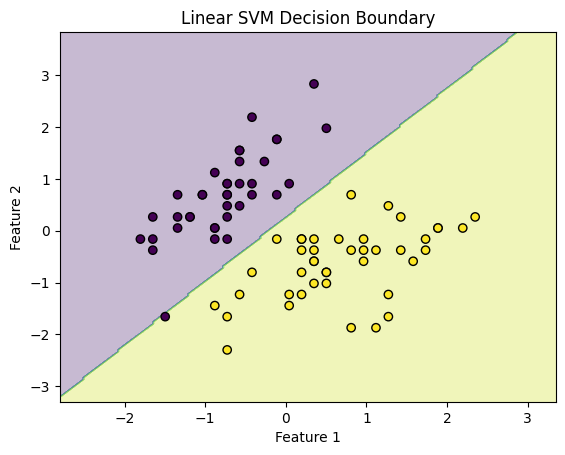

In [10]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Linear SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_model, X_train, y_train)
